In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Serbatoi comunicanti

**Tre serbatoi comunicano attraverso condotte**

<center>
<img src="assets/tubes3_a.png" width=30%/>
</center>

* Il problema può essere modellato con un circuito RC

<center>
<img src="assets/tubes3.png" width=40%/>
</center>

* La tensioni corrispondono a valori di pressione (i.e. $P_1$, $P_2$, $P_3$)
* Le correnti a flussi di acqua (i.e. $q_{12}$, $q_{23}$, $q_{31}$)


**Il sistema è descritto dall'ODE:**

$$
\left(\begin{array}{c}
\dot{P}_1 \\
\dot{P}_2 \\
\dot{P}_3
\end{array}\right)
=
\left(\begin{array}{c}
\frac{1}{C_1} (q_{31} - q_{12}) \\
\frac{1}{C_2} (q_{12} - q_{23}) \\
\frac{1}{C_3} (q_{23} - q_{31})
\end{array}\right)
$$

Con:

$$
\begin{align}
& q_{12} = \frac{1}{R_{12}} (P_1 - P_2) && q_{23} = \frac{1}{R_{23}} (P_2 - P_3) \\
& q_{31} = \frac{1}{R_{31}} (P_3 - P_1)
\end{align}
$$

## Esercizio 1

**Nel modulo `sol.tubes` si definisca una classe:**

```python
class Dstate:
    def __init__(self, C1, C2, C3, R12, R23, R31):
        ...

    def __call__(self, X, t):
        ...
```

* Il metodo `__call__` deve calcolare la funzione che definisce l'ODE
* Il metodo deve restituire un array `numpy` con le due componenti della derivata

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def simulate(f, X0, t)
```

...Che si simuli il comportamento dei serbatoi:

* La funzione deve restituire una tupla contenente (nell'ordine):
  - La matrice con gli stati visitati
  - Il vettore con i valori del tempo

Si utilizzi la funzione per risolvere un problema ai valori iniziali con lo stato iniziale indicato nella cella seguente (i.e. `P1_0, P2_0, P3_0`).

Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.



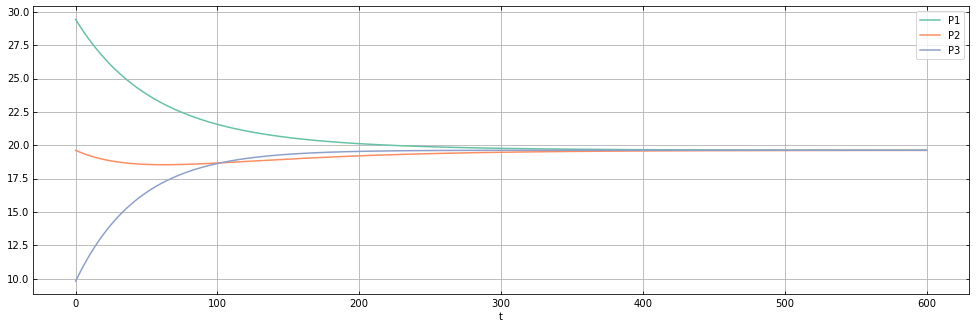

In [3]:
import numpy as np
from base import util
from sol import tubes

# Dati intermedi
g = 9.81
S1 = 1 # Superfici
S2 = 1
S3 = 1
h1 = 3 # Livelli dei serbatoi
h2 = 2
h3 = 1
qmax12 = 0.0002 # Portata per unita' di pressione
qmax23 = 0.0007
qmax31 = 0.0008

# Capacita'
C1 = S1/g
C2 = S2/g
C3 = S3/g

# Resistenze
R12 = 1/qmax12
R23 = 1/qmax23
R31 = 1/qmax31

# Pressioni iniziali
P1_0 = h1 * g
P2_0 = h2 * g
P3_0 = h3 * g


X0 = np.array([P1_0, P2_0, P3_0])
t = np.linspace(0, 600, 600)
dstate = tubes.Dstate(C1, C2, C3, R12, R23, R31)
X, t = tubes.simulate(dstate, X0, t)
util.plot_state_evolution(X, t, ylabels=['P1', 'P2', 'P3'], xlabel='t', figsize=(20, 5), same_scale=True)

## Esercizio 2

Per definizione, all'equilibrio lo stato $x$ di un sistema non ha variazioni. Nel nostro caso, le derivate da annullare:

$$
\left(\begin{array}{c}
\frac{1}{C_1} (q_{31} - q_{12}) \\
\frac{1}{C_2} (q_{12} - q_{23}) \\
\frac{1}{C_3} (q_{23} - q_{31})
\end{array}\right)
=
\left(\begin{array}{c}
0\\
0\\
0
\end{array}\right)
$$

Tuttavia, l'annullamento delle derivate non è sufficiente per determinare i punti di equilibrio. Il sistema è sottoderminato e dobbiamo imporre un'ulteriore condizione sulle pressioni dell'acqua. Ad esempio, possiamo richiedere che la pressione totale sia pari ad $1 Pa$ (Pascal) :

$$
P_{1} + P_{2} + P_{3} = 1
$$

Dunque, l'equazione che caratterizza un equilibrio è:

$$
\left(\begin{array}{c}
\frac{1}{C_1} (q_{31} - q_{12}) \\
\frac{1}{C_2} (q_{12}- q_{23}) \\
P_{1} + P_{2} + P_{3} - 1
\end{array}\right)
=
\left(\begin{array}{c}
0\\
0\\
0
\end{array}\right)
$$


**Nel modulo `sol.tubes` si definisca la funzione:**

```python
def find_equilibrium_aux(X):
    # Dati intermedi
    g = 9.81
    S1 = 1 # Superfici
    S2 = 1
    S3 = 1
    h1 = 3 # Livelli dei serbatoi
    h2 = 2
    h3 = 1
    qmax12 = 0.0002 # Portata per unita' di pressione
    qmax23 = 0.0007
    qmax31 = 0.0008
    # Capacita'
    C1 = S1/g
    C2 = S2/g
    C3 = S3/g
    # Resistenze
    R12 = 1/qmax12
    R23 = 1/qmax23
    R31 = 1/qmax31
    # Pressioni iniziali
    P1_0 = h1 * g
    P2_0 = h2 * g
    P3_0 = h3 * g
    ...
```

* La funzione deve restituire i valori delle equazioni da azzerare


```python
def find_equilibrium():
    x0 = [5,2,12] # Pressioni iniziali
```

* La funzione deve utilizzare il metodo `scipy.optimize.fsolve` per determinare il punto di equilibrio a partire dalle pressioni iniziali indicate
* La funzione deve restituire il valore del punto di equilibrio

Si stampino a video i valori.

In [4]:
P1_eq, P2_eq, P3_eq = tubes.find_equilibrium()
print(f'Pressioni di equilibrio: {P1_eq, P2_eq, P3_eq}')

Pressioni di equilibrio: (0.3333333333333333, 0.3333333333333333, 0.3333333333333333)


## Esercizio 3

Supponiamo di voler costruire i tre serbatoi in modo che, fissate le pressioni, il flusso d'acqua in ciascuna condotta sia pari a $6 m^3/s$:

$$
\left(\begin{array}{c}
q_{12} \\
q_{23} \\
q_{31}
\end{array}\right)
=
\left(\begin{array}{c}
6\\
6\\
6
\end{array}\right)
$$

Da cui si ottengono facilmente le equazioni:

$$
\begin{array}{c}
q_{12} -6 =0\\
q_{23}- 6 =0\\
q_{31}-6 =0
\end{array}
$$

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def find_resistances_aux(x):
    # Pressioni
    P1,P2,P3 = [5,4,6]
    ...
```

* La funzione restituisce il valore delle funzioni da azzerare.

**Nel modulo `sol.tubes` si definisca una funzione:**

```python
def find_resistances():
    x0 = [4,5,7] # Resistenze iniziali
    ...
```

* La funzione calcola i valori delle resistenze necessari per ottenere flusso d'acqua in ciascunaciascun condotta.
* La funzione restituisce in una tupla (nell'ordine) $R_{12}, R_{23}, R_{31}$.

Si stampino a video i valori.

In [9]:
R12,R23,R31 = tubes.find_resistances()
print(f"{R12},{R23},{R31}")

1.0000000000610914,5.663347053740206,7.78266858736304
